In [1]:
# Load data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing
import sklearn
from sklearn.tree import DecisionTreeClassifier


import project_env as pe

%matplotlib inline

In [2]:
data = pe.load_split_bucket(519, target='y_60m', log=False) #need to run this in the same folder as the data

In [3]:
training_X, training_y = data['train']

print(len(training_X.columns))
print(training_X.columns)

22
Index(['apparentTemperature', 'cloudCover', 'dewPoint', 'humidity',
       'nearestStormDistance', 'ozone', 'precipIntensity', 'precipProbability',
       'pressure', 'temperature', 'visibility', 'windBearing', 'windSpeed',
       'num_bikes_available_scaled', 'num_bikes_disabled_scaled',
       'num_docks_available_scaled', 'day_of_week', 'hour_of_day',
       'is_weekend', 'traffic_0_speed_scrub', 'traffic_1_speed_scrub',
       'traffic_2_speed_scrub'],
      dtype='object')


# Decision Tree

In [11]:
def do_dt(split_data, criteria, min_split, min_leaf):
    train_X, train_y = split_data['train']
    dev_X, dev_y = split_data['dev']
    
    #test differnt criterion?
    dt = DecisionTreeClassifier(criterion=criteria, min_samples_split=min_split, min_samples_leaf=min_leaf)
    dt = dt.fit(train_X,train_y)
    
    dev_decision = dt.predict_proba(dev_X)[:,1]
    dev_pred = dt.predict(dev_X)
    
    acc = sklearn.metrics.accuracy_score(dev_y, dev_pred)
    print('Evaluating on dev set of {} examples'.format(len(dev_y)))
    print('Accuracy:', acc)
    
    print(sklearn.metrics.confusion_matrix(dev_y, dev_pred))

    plt.figure()
    plt.plot(dev_y.as_matrix()[100:500], 'b')
    plt.plot(dev_pred[100:500], 'g')
    plt.plot(0.5 * (dev_y.as_matrix() - dev_pred)[100:500], 'r')
    plt.ylim(-3, 3)
    plt.show()
    
    return dt, dev_decision, dev_pred

Evaluating on dev set of 968 examples
Accuracy: 0.805785123967
[[450 135]
 [ 53 330]]


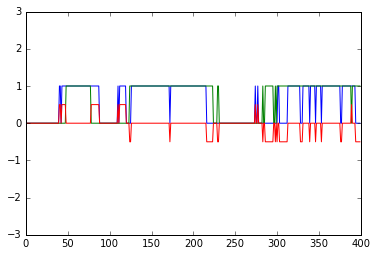

In [26]:
data_empty = pe.binarize(data, -1)
dt_empty, dev_decision_empty, dev_pred_empty = do_dt(data_empty,'entropy',50,50)

Evaluating on dev set of 968 examples
Accuracy: 0.95041322314
[[920   0]
 [ 48   0]]


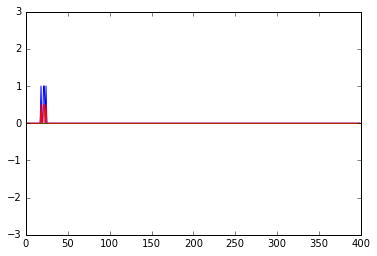

In [33]:
data_full = pe.binarize(data, 1)
dt_full, dev_decision_full, dev_pred_full = do_dt(data_full,'entropy',50,50)

Model baseline empty
  Max precision: 0.528301886792 at recall 0.950391644909
  Threshold of max precision: 0.540983606557
Model Decision Tree
  Max precision: 0.395661157025 at recall 1.0
  Threshold of max precision: 0.0


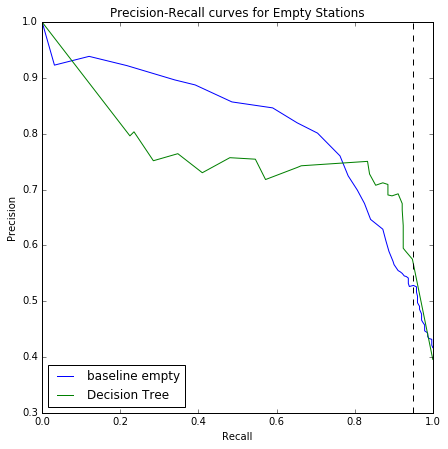

In [34]:
from sklearn.metrics import precision_recall_curve

gold_labels = data_empty['dev'][1]

def pr_curve(predictions, label):
    curve = precision_recall_curve(gold_labels, predictions)
    precision, recall, thresholds = curve
    mp, mr, mt = pe.max_precision_for_recall(curve)
    print('Model', label)
    print('  Max precision:', mp, 'at recall', mr)
    print('  Threshold of max precision:', mt)
    plt.plot(recall, precision, label=label)
   
plt.figure(figsize=(7, 7))
pr_curve(data_empty['dev'][0]['num_docks_available_scaled'], 'baseline empty')
pr_curve(dev_decision_empty, 'Decision Tree')

#plt.xlim([0.9, 1.0])
#plt.ylim([0.4, 0.7])
plt.axvline(x=0.95, color='k', linestyle='--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="lower left")
plt.title('Precision-Recall curves for Empty Stations')
plt.show()

Model baseline full
  Max precision: 0.301282051282 at recall 0.979166666667
  Threshold of max precision: 0.590163934426
Model Decision Tree
  Max precision: 0.0495867768595 at recall 1.0
  Threshold of max precision: 0.0


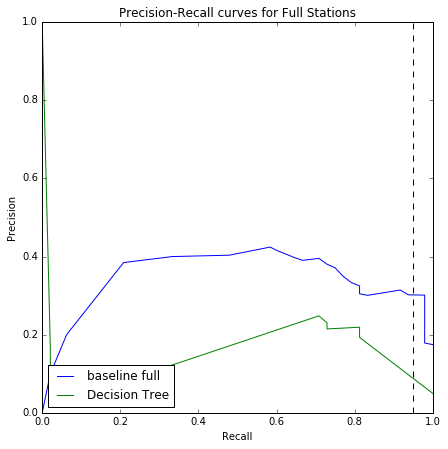

In [35]:
gold_labels = data_full['dev'][1]
   
plt.figure(figsize=(7, 7))
pr_curve(data_full['dev'][0]['num_bikes_available_scaled'], 'baseline full')
pr_curve(dev_decision_full, 'Decision Tree')

#plt.xlim([0.9, 1.0])
#plt.ylim([0.4, 0.7])
plt.axvline(x=0.95, color='k', linestyle='--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="lower left")
plt.title('Precision-Recall curves for Full Stations')
plt.show()